In [40]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import cmath
import scipy
from scipy.fftpack import fft, ifft, fftfreq
import scipy.signal
from scipy.integrate import quad

# Discrete Fourier Transform

Abbiamo visto che nel caso in cui $x(n)$ sia un segnale non periodico, la sua trasformata di Fourier $X(\omega)$ è una funzione continua della frequenza (o meglio, della pulsazione). Perciò $X(\omega)$ non è una rappresentazione conveniente (dal punto di vista computazionale) nel dominio delle frequenze del segnale $x(n)$. Per questo motivo, consideriamo la rappresentazione di $x(n)$ nel dominio delle frequenze attraverso un campionamento dello spettro $X(\omega)$. Questo approccio porta alla definizione di uno strumento computazionalmente molto conveniente: Discrete Fourier Transform (DFT)

### Campionamento e ricostruzione di segnali discreti non periodici
Abbiamo visto che la trasformata di Fourier per un segnale $x(n)$ non periodico, e con energia finita, è definita nel seguente modo.
$$
X(\omega)=\sum_{n=-\infty}^{\infty} x(n) e^{-j \omega n} = \sum_{n=-\infty}^{\infty} x(n) e^{-j 2 \pi f n}
$$
Sappiamo che $X(\omega)$ è una funzione periodica, di periodo $2\pi$. Supponiamo dunque di voler campionare nell'intervallo $\omega \in [0,2\pi]$ tale funzione. Se prendiamo $N$ campioni equidistanti in tale intervallo, allora avremo un campione per ogni k-esima frequenza, con $k=0,1,..., N-1$. Con questa impostazione, non dobbiamo più parametrizzare nel continuo, con $\omega$, ma possiamo parametrizzare con la quantità $\frac{2 \pi k}{N}, k=0,1,..., N-1$. Perciò possiamo riscrivere
$$
X\left(\frac{2 \pi}{N} k\right)= \sum_{n=-\infty}^{\infty} x(n) e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1,..., N-1
$$
La relazione appena scritta si può ridefinire nel seguente modo (<i> Dimostrazione a pag. 450 del libro [1]</i>):
$$
X\left(\frac{2 \pi}{N} k\right)=\sum_{n=0}^{N-1}\left[\sum_{l=-\infty}^{\infty} x(n-l N)\right] e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1,..., N-1
$$
A questo punto soffermiamoci sul seguente segnale:
$$
x_{p}(n)=\sum_{l=-\infty}^{\infty} x(n-l N)
$$
Il segnale $x_{p}(n)$ sarebbe la somma di tutti i possibili shift di $x(n)$ a multipli di $N$. Esso è dunque un segnale periodico di periodo $N$, e di conseguenza, può essere espanso in serie di Fourier nel seguente modo:
$$
x_{p}(n)=\sum_{k=0}^{N-1} c_{k} e^{j 2 \pi k n / N}, \quad n=0,1, \ldots, N-1
$$
con coefficienti di Fourier $c_{k}$.
$$
c_{k}=\frac{1}{N} \sum_{n=0}^{N-1} x_{p}(n) e^{-\frac{j 2 \pi k n}{ N}}, \quad k=0,1, \ldots, N-1
$$
Visto che
$$
X\left(\frac{2 \pi}{N} k\right) = \sum_{n=0}^{N-1} x_{p}(n) e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1,..., N-1
$$
Allora possiamo riscrivere i coefficienti $c_{k}$ nel seguente modo:
$$
c_{k}=\frac{1}{N} X\left(\frac{2 \pi}{N} k\right), \quad k=0,1, \ldots, N-1
$$
Perciò:
$$
x_{p}(n)=\frac{1}{N}\sum_{k=0}^{N-1} X\left(\frac{2 \pi}{N} k\right) e^{\frac{j 2 \pi k n }{N}}, \quad n=0,1, \ldots, N-1
$$
Attenzione! Non è certo garantito che una volta ottenuto il segnale $x_{p}(n)$, io possa riottenere $x(n)$ e $X(\omega)$. In particolare, se il segnale $x(n)$ è limitato nel tempo (ovvero dopo un determinato valore $N_{lim}$ assume valore 0), allora $x(n)=x_{p}(n)$ se $N \geq N_{lim}$. In caso contrario, si ha il fenomeno di aliasing.
##### Aliasing nel dominio del tempo e ricostruzione di $x(n)$ partendo da $N$ campioni di $X(\omega)$
Ricapitoliamo tutto formalizzando l'ultimo concetto espresso. Dato un segnale $x(n)$ non periodico, chiamiamo $X(\omega)$ la sua trasformata di Fourier. Andiamo a campionare N volte $X(\omega)$ nell'intervallo $\omega \in [0,2\pi]$. A questo punto, se voglio ricostruire $x(n)$, devo passare per forza per il calcolo di  $x_{p}(n)$. Il segnale $x_{p}(n)$ lo ottengo con la seguente formula:
$$
x_{p}(n)=\frac{1}{N}\sum_{k=0}^{N-1} X\left(\frac{2 \pi}{N} k\right) e^{\frac{j 2 \pi k n }{N}}, \quad n=0,1, \ldots, N-1
$$
Supponiamo che $x(n)$ è limitato nel tempo, in quanto dopo i primi $N_{lim}$ campioni ho $x(n) = 0 \forall n \in \mathbb{R}$. In questo caso, se $N \geq N_{lim}$, allora $x(n) = x_{p}(n) \text{ per } 0 \leq n \leq N-1$. O meglio, possiamo riscrivere più correttamente:
$$
x(n)=\left\{\begin{array}{ll}
x_{p}(n), & 0 \leq n \leq N-1 \\
0, & \text { altrimenti }
\end{array}\right.
$$
Se invece $N \leq N_{lim}$ allora $x_{p}(n)$ è un aliasing di $x(n)$.

#### Esempio
Per capire ciò che abbiamo scritto fino ad ora, facciamo un esempio pratico. Consideriamo il segnale 
$$
x(n)=a^{n} u(n), \quad-1<a<1
$$ 
con a = 0.5
Vogliamo andare a definire la quantità $x_{p}(n)$. Ovviamente tale quantità dipende dal numero di campioni $N$ che prendiamo dalla trasformata di Fourier. 

In [41]:
def fn(n, a):
    assert abs(a) <= 1
    if n>=0:
        out = a**n
    else:
        out = 0
    return out
def calc_x_n(n, a):
    return [fn(i, a) for i in n] #np.array([fn(i, a) for i in n]) #np.vectorize(fn)(n, a)

In [42]:
def fourier_transform(w, a):
    return 1/(1 - a*(np.cos(w) - 1j*np.sin(w)))
def calc_fourier_transform(w,a):
    return np.vectorize(fourier_transform)(w, a)

Per prima cosa plottiamo il segnale originale

No handles with labels found to put in legend.


Frequenza = 0.33 cicli/unità_tempo = -0.01 Hz


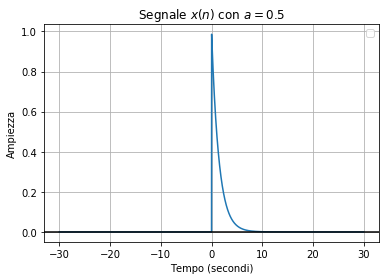

In [43]:
fs = 50
n = np.arange(-30, 30, 1/fs)
f = 1/3
f_hz = f/n[1]
print('Frequenza = {} cicli/unità_tempo = {} Hz'.format(np.round(f, 2), np.round(f_hz, 2)))
a = 0.5
x_n = calc_x_n(n, a)
plt.plot(n, x_n)
plt.title('Segnale $x(n)$ con $a = {}$'.format(a))
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.legend(loc='upper right')
plt.show()

Per implementare $x_p(n)$ consideriamo la seguente definizione:
$$
x_{p}(n)=\sum_{l=-\infty}^{\infty} x(n-l N)
$$

<i> NB: In questo esempio assumiamo che $l = [-30, 40]$, ma in realtà teniamo a mente che il range è $l = [-\infty, \infty]$. Ci serve fare questo semplicemente perchè in questo modo posso fare tutti i grafici. Questo implica che quando vediamo il grafico di $x_{p}(n)$ dobbiamo immaginare che la sua periodicità per N si ripete da $-\infty$ a $\infty$.</i>

In [44]:
l_list = np.arange(-30,40)
def calc_x_pn(l_list, n, N, a):
    x_pn = []
    for l in l_list:
        n_l = n - l*N
        x_pn.append(calc_x_n(n_l, a))
    x_pn = np.array(x_pn)
    return np.sum(x_pn,axis = 0)

Ora vediamo al variare di N, come diventa il grafico di $x_p(n)$. Se N è troppo piccolo (ad esempio N = 1, 2, 5) vediamo che chiaramente c'è il fenomeno di aliasing. Invece se prendiamo N = 10, 20, etc.. il segnale è ben rappresentato. NB: In questo caso specifico, anche N = 10 in realtà è un po' un aliasing perchè il segnale originale non ha proprio ampiezza nulla nell'intervallo $n \in [10, \infty]$, essendo la quantità $a^n$ comunque maggiore di zero (l'asse x è una sorta di asintoto). Tuttavia, possiamo assumere che sia nulla, in quanto la stragrande maggioranza dell'energia del segnale originale (ad occhio è più del 99%) è compresa nell'intervallo $n \in [0, 10]$. Perciò diremo che non è aliasing. Assumiamo cioè che il segnale sia limitato nel tempo con $N_{lim} = 10$.

No handles with labels found to put in legend.


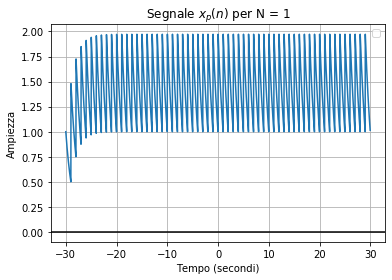

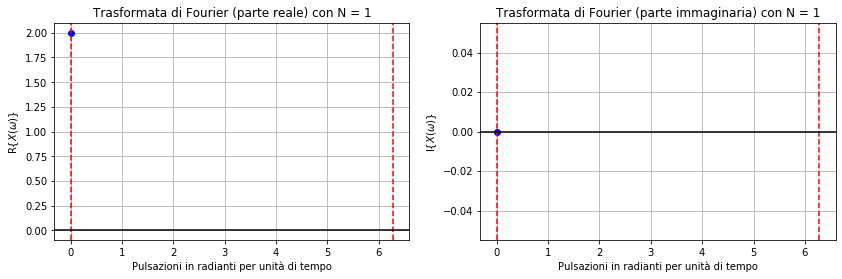

No handles with labels found to put in legend.


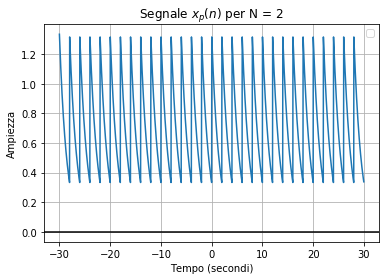

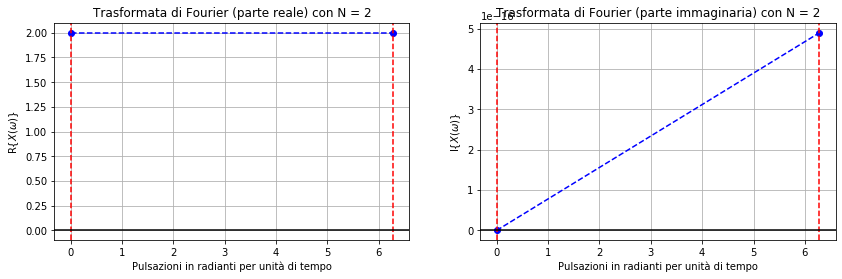

No handles with labels found to put in legend.


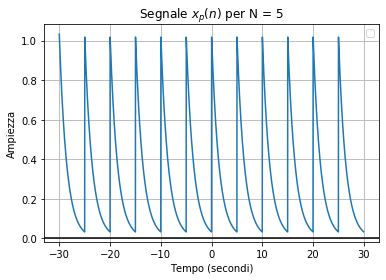

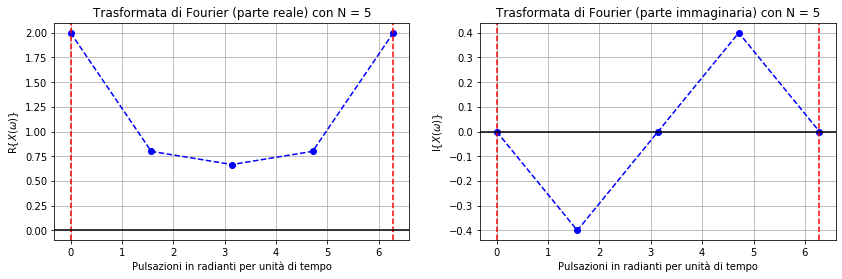

No handles with labels found to put in legend.


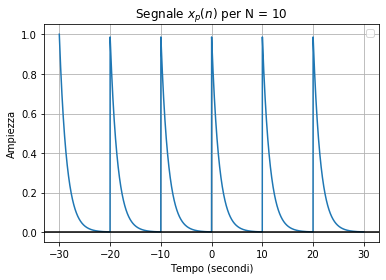

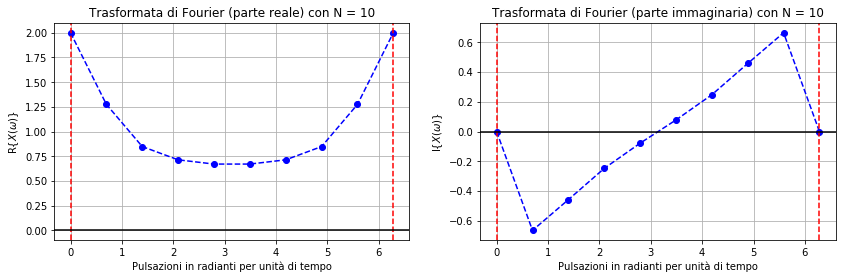

No handles with labels found to put in legend.


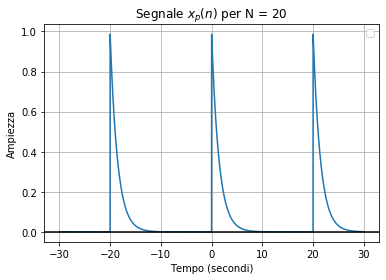

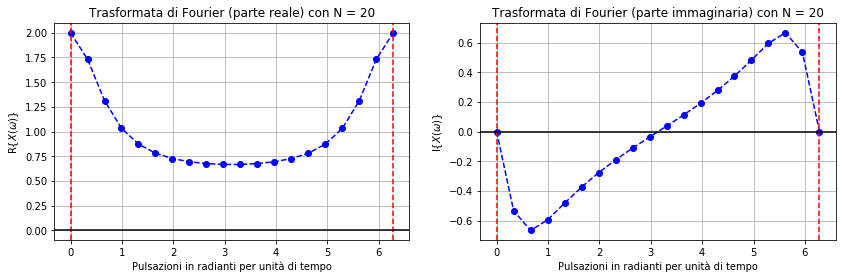

In [45]:
Ns = [1, 2, 5, 10, 20]
for N in Ns:
    x_pn = calc_x_pn(l_list = l_list, n = n, N = N, a = a)
    plt.plot(n, x_pn)
    plt.title('Segnale $x_p(n)$ per N = {}'.format(N))
    plt.xlabel('Tempo (secondi)')
    plt.ylabel('Ampiezza')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend(loc='upper right')

    ws = np.linspace(0, 2*np.pi, N)
    ft = calc_fourier_transform(ws, a)
    fig, axs = plt.subplots(1,2, figsize=(14, 4))
    #if 
    axs[0].plot(ws, ft.real, '--bo', color = 'b')
    axs[0].axvline(x=0, color='r', ls='--')
    axs[0].axvline(x=2*np.pi, color='r', ls='--')
    axs[0].set_title('Trasformata di Fourier (parte reale) con N = {}'.format(N))
    axs[0].set_xlabel('Pulsazioni in radianti per unità di tempo')
    axs[0].set_ylabel('R{$X(\omega)$}')
    axs[0].grid(True, which='both')
    axs[0].axhline(y=0, color='k')

    axs[1].plot(ws, ft.imag, '--bo', color = 'b')
    axs[1].axvline(x=0, color='r', ls='--')
    axs[1].axvline(x=2*np.pi, color='r', ls='--')
    axs[1].set_title('Trasformata di Fourier (parte immaginaria) con N = {}'.format(N))
    axs[1].set_xlabel('Pulsazioni in radianti per unità di tempo')
    axs[1].set_ylabel('I{$X(\omega)$}')
    axs[1].grid(True, which='both')
    axs[1].axhline(y=0, color='k')
    plt.show()

Vediamo che all'aumentare del numero di campioni N nel range $\omega \in [0, 2 \pi]$, si ha una maggiore precisione nel ricostruire $x_p(n)$

Andiamo ora a scrivere il segnale $x_p(n)$ con la seguente formula
$$
x_{p}(n)=\frac{1}{N}\sum_{k=0}^{N-1} X\left(\frac{2 \pi}{N} k\right) e^{\frac{j 2 \pi k n }{N}}, \quad n=0,1, \ldots, N-1
$$

In [46]:
def fn_xp_n(n, N, a):
    res = []
    for k in range(N):
        res.append(calc_fourier_transform(2*np.pi*k/N, a)*(np.cos(2*np.pi*k*n/N)+ 1j*np.sin(2*np.pi*k*n/N)))
    return 1/N*np.sum(res)
def calc_x_pn2(n, N, a):
    return np.array([fn_xp_n(i, N, a) for i in n])

No handles with labels found to put in legend.


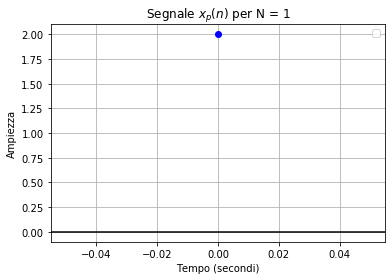

No handles with labels found to put in legend.


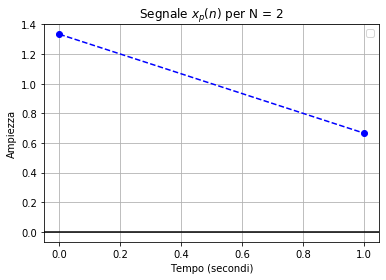

No handles with labels found to put in legend.


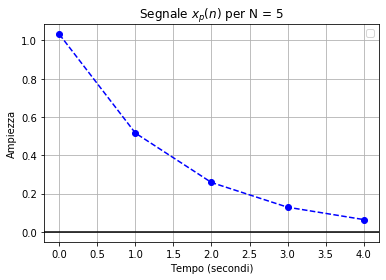

No handles with labels found to put in legend.


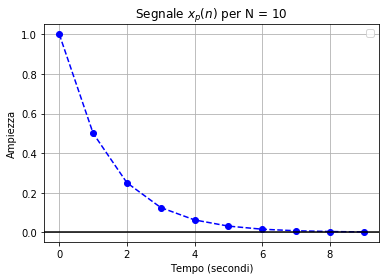

No handles with labels found to put in legend.


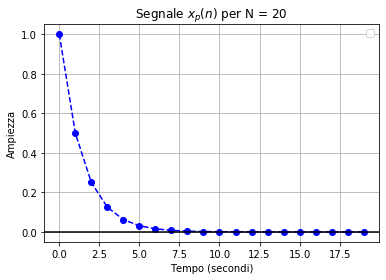

In [47]:
idx = 0
for N in Ns:
    n_ = np.arange(N)
    x_pn = calc_x_pn2(n = n_, N = N, a = a)
    plt.plot(n_, x_pn.real, '--bo')
    plt.title('Segnale $x_p(n)$ per N = {}'.format(N))
    plt.xlabel('Tempo (secondi)')
    plt.ylabel('Ampiezza')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend(loc='upper right')
    plt.show()

Ora abbiamo visto la differenza nell'implementazione tra le due definizioni di $x_p(n)$. Le due definizioni coincidono perchè $x_p(n)$ è periodico di periodo N. Se volessi ottenere gli stessi plot della prima implementazione utilizzando la seconda formula di $x_p(n)$ dovrei semplicemente replicare il segnale ottenuto con un determinato $N$ per tutto l'asse temporare $n$. 

### Discrete Fourier Transform (DFT)

Abbiamo visto che quando un segnale $x(n)$ è limitato nel tempo (ovvero dopo un determinato valore $N_{lim}$ assume valore 0), allora la sua trasformata di Fourier può essere definita nel seguente modo:

$$
X(\omega) = X\left(\frac{2 \pi}{N} k\right) = \sum_{n=0}^{N-1} x_{p}(n) e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1,..., N-1
$$

dove $N$ è il numero di campioni equidistanti che seleziono dallo spettro $X(\omega)$ nello spazio $0 \leq \omega \leq 2 \pi$. A questo punto, abbiamo visto che se $N \leq N_{lim}$, allora $x_p(n)$ è aliasing di $x(n)$. Viceversa, sappiamo che se $N \geq N_{lim}$, allora:
$$
x_p(n)=\left\{\begin{array}{ll}
x(n), & 0 \leq n \leq N_{lim}-1 \\
0, & N_{lim} \leq n \leq N -1 
\end{array}\right.
$$
In questo caso, possiamo riscrivere la formula di $X(\omega)$ nel seguente modo.
$$
X(\omega)=\sum_{n=0}^{N_{lim}-1} x(n) e^{-j \omega n}, \quad 0 \leq \omega \leq 2 \pi
$$
Visto che la funzione dipende da $k$, solitamente si parametrizza in $k$, nel seguente modo:
$$
X(k) \equiv X\left(\frac{2 \pi k}{N}\right)=\sum_{n=0}^{N_{lim}-1} x(n) e^{-j \omega n} =\sum_{n=0}^{N-1} x(n) e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1,2, \ldots, N-1
$$
NB: Il limite superiore della sommatoria può essere scritto sia con $N_{lim}-1$ che con $N-1$, in quanto, come detto, il segnale $x(n)$ è nullo in $[N_{lim}, N-1]$.

In pratica la formula appena scritta ci permette di trasformare un segnale $x(n)$ di lunghezza $N_{lim} \leq N$ definito nel tempo, in un segnale $X(k)$ di lunghezza $N$ definito nel dominio delle frequenze. L'ultima formula è definita <b> DFT (Discrete Fourier Transform)</b>. Con la relazione inversa si ottiene l'<b> Inverse Discrete Fourier Transform (IDFT)</b>. Vengono di seguito riassunte:
$$
\text{DFT}: \qquad X(k) =\sum_{n=0}^{N-1} x(n) e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1,2, \ldots, N-1 \\
\text{IDFT}: \qquad x(n) = \frac{1}{N} \sum_{n=0}^{N-1} X(k) e^{j \frac{2 \pi k n}{N}}, \quad n=0,1,2, \ldots, N-1
$$

### Relazione tra DFT e Serie di Fourier
Una sequenza periodica $x_{p}(n)$ con periodo $N$ può essere scomposta con la Serie di Fourier nel seguente modo
$$
x_{p}(n)=\sum_{k=0}^{N-1} c_{k} e^{j \frac{2 \pi k n}{N}}, \quad-\infty<n<\infty
$$
dove i coefficienti della serie sono definiti da $c_k$.
$$
c_{k}=\frac{1}{N} \sum_{n=0}^{N-1} x_{p}(n) e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1, \ldots, N-1
$$
Se confrontiamo le formule per la definizione di  $X(k)$ (DFT) e $c_k$ (DTFS) ci accorgiamo che
$$
X(k)=N c_{k}
$$

### Relazione tra DFT e Trasformate di Fourier
<i> Vedi pag. 462 del libro [1] </i> $\rightarrow$ più o meno ripete quello che abbiamo già detto in questo notebook.

### Relazione tra DFT e Trasofrmata-z
<i> Vedi pag. 463 del libro [1] </i> 

# Proprietà della Discrete Fourier Transform 
Per denotare una coppia di $N$ campioni $x(n)$ e $X(k)$ caratterizzata da una trasformazione DFT, utilizzeremo la seguente notazione.
$$
x(n)\mathop{\longleftrightarrow}_{N}^{DFT}X(k)
$$

### Periodicità. 
Se $x(n)$ e $X(k)$ sono una coppia DFT di $N$ campioni, allora:
$$
\begin{aligned}
x(n+N) &=x(n) & & \forall n \\
X(k+N) &=X(k) & & \forall k
\end{aligned}
$$
### Linearità
Se
$$
x_{1}(n) \mathop{\longleftrightarrow}_{N}^{DFT} X_{1}(k)
$$
e
$$
x_{2}(n) \mathop{\longleftrightarrow}_{N}^{DFT} X_{2}(k)
$$
allora, per ogni costante reale o complessa $a_{1}, a_{2} \subset \mathbb{C}$,
$$
a_{1} x_{1}(n)+a_{2} x_{2}(n) \mathop{\longleftrightarrow}_{N}^{DFT} a_{1} X_{1}(k)+a_{2} X_{2}(k)
$$
### Simmetrie circolari di una sequenza
<i> Vedi pag. 465 del libro [1] </i> 

### Proprietà di simmetria del DFT
Se $x(n)$ e $X(k)$ sono una coppia (di segnali complessi) DFT di $N$ campioni. Possiamo scomporli in parte reale e immaginaria.
$$
\begin{array}{rlr}
x(n) & =x_{R}(n)+j x_{I}(n), & 0 \leq n \leq N-1 \\
X(k) & =X_{R}(k)+j X_{I}(k), & 0 \leq k \leq N-1
\end{array}
$$
A questo punto otteniamo dalla definizione del DFT le seguenti relazioni per $X_{R}(k)$ e $X_{I}(k)$.
$$
X_{R}(k)=\sum_{n=0}^{N-1}\left[x_{R}(n) \cos \frac{2 \pi k n}{N}+x_{I}(n) \sin \frac{2 \pi k n}{N}\right]
$$
$$
X_{I}(k)=-\sum_{n=0}^{N-1}\left[x_{R}(n) \sin \frac{2 \pi k n}{N}-x_{I}(n) \cos \frac{2 \pi k n}{N}\right]
$$
In modo del tutto analogo possiamo ricavare le  relazioni per $x_{R}(k)$ e $x_{I}(k)$.
$$
\begin{aligned}
x_{R}(n) &=\frac{1}{N} \sum_{k=0}^{N-1}\left[X_{R}(k) \cos \frac{2 \pi k n}{N}-X_{I}(k) \sin \frac{2 \pi k n}{N}\right] \\
x_{I}(n) &=\frac{1}{N} \sum_{k=0}^{N-1}\left[X_{R}(k) \sin \frac{2 \pi k n}{N}+X_{I}(k) \cos \frac{2 \pi k n}{N}\right]
\end{aligned}
$$

### Proprietà per sequenze reali
Se $x(n)$ è reale, allora
$$
X(N-k)=X^{*}(k)=X(-k)
$$
Di conseguenza, $|X(N-k)|=|X(k)|$ e $\angle X(N-k)=-\angle X(k) .$ Inoltre, $x_{I}(n)=$ 0.

### Sequenze reali e pari
Se $x(n)$ è pari e reale, ovvero,
$$
x(n)=x(N-n), \quad 0 \leq n \leq N-1
$$
allora $X_{I}(k)=0 .$ Perciò il DFT si riduce a:
$$
X(k)=\sum_{n=0}^{N-1} x(n) \cos \frac{2 \pi k n}{N}, \quad 0 \leq k \leq N-1
$$
che è anch'esso pari e reale. Inoltre, visto che $X_{I}(k)=0,$ allora l'IDFT si riduce a:
$$
x(n)=\frac{1}{N} \sum_{k=0}^{N-1} X(k) \cos \frac{2 \pi k n}{N}, \quad 0 \leq n \leq N-1
$$
### Sequenze reali e dispari
Se $x(n)$ è dispari e reale, ovvero,
$$
x(n)=-x(N-n), \quad 0 \leq n \leq N-1
$$
allora $X_{R}(k)=0 .$ Perciò
$$
X(k)=-j \sum_{n=0}^{N-1} x(n) \sin \frac{2 \pi k n}{N}, \quad 0 \leq k \leq N-1
$$
che è del tutto immaginaria e dispari. Visto che $X_{R}(k)=0,$ allora l'IDFT si riduce a:
$$
x(n)=j \frac{1}{N} \sum_{k=0}^{N-1} X(k) \sin \frac{2 \pi k n}{N}, \quad 0 \leq n \leq N-1
$$
### Sequenze del tutto immaginarie
<i> Vedi pag. 469 del libro [1] </i> 

### Moltiplicazione di due DFT e convoluzione circolare
Supponiamo di avere due coppie di segnali $x_1(n)$ $x_2(n)$ e le rispettive trasformate DFT (entrambi di $N$ campioni) $X_1(k)$ e $X_2(k)$.
$$
X_1(k) =\sum_{n=0}^{N-1} x_1(n) e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1,2, \ldots, N-1 \\
X_2(k) =\sum_{n=0}^{N-1} x_2(n) e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1,2, \ldots, N-1 
$$
Se moltiplichiamo le due trasformate DFT, il risultato sarà $X_3(k)$ che è il DFT della sequenza $x_3(n)$ sempre di lunghezza N.
$$
X_3(k) = X_1(k)X_2(k) \quad k=0,1,2, \ldots, N-1 
$$
Vediamo ora a che cosa corrisponde l'IDFT di $X_3(k)$. 
$$
x_{3}(m) =\frac{1}{N} \sum_{k=0}^{N-1} X_{3}(k) e^{j \frac{2 \pi k m}{N}} =\frac{1}{N} \sum_{k=0}^{N-1} X_{1}(k) X_{2}(k) e^{j \frac{2 \pi k m}{N}} = \dots = \\
x_{3}(m)=\sum_{n=0}^{N-1} x_{1}(n) x_{2}((m-n))_{N}, \quad m=0,1, \ldots, N-1
$$
Dove $x_{2}((m-n))_{N} = \begin{cases} x_{2}(N + m-n) & \mbox{ se $(m - n)$ < 0} \\
x_{2}(0) & \mbox{se $(m - n)$ = 0} \\
x_{2}(m-n) & \mbox{se $(m - n)$ > 0}\end{cases}$

<i> Dimostrazione a pag. 471 del libro [1] </i> 

L'espressione ha la forma di una somma convoluzionale. Tuttavia, non è la classica convoluzione lineare che mette in relazione la sequenza di output $y(n)$ (di un sistema lineare) all'input $x(n)$ e alla risposta all'inpulso $h(n)$. Quella appena scritta è chiamata <b> convoluzione circolare</b>. Perciò la moltiplicazione di due DFT è la convoluzione circolare delle sequenze nel dominio del tempo.

#### Esempio
Effettuare la convoluzione circolare delle sequenze $x_1(n)$ $x_2(n)$
$$
\begin{array}{l}
x_{1}(n)=\{2,1,2,1\} \quad n = 0, 1, 2, 3\\
x_{2}(n)=\{1,2,3,4\} \quad n = 0, 1, 2, 3
\end{array}
$$
La formula per il calcolo è la seguente
$$
x_{3}(m)=\sum_{n=0}^{N-1} x_{1}(n) x_{2}((m-n))_{N}, \quad m=0,1, \ldots, N-1
$$
Andiamo a calcolare punto per punto i valori di $x_{3}(m)$
- $m = 0 \rightarrow$
$$
x_{3}(0)=\sum_{n=0}^{3} x_{1}(n) x_{2}((-n))_{4} = \\
= x_{1}(0) x_{2}((-0))_{4} + x_{1}(1) x_{2}((-1))_{4} + x_{1}(2) x_{2}((-2))_{4} + x_{1}(3) x_{2}((-3))_{4} = \\
= x_{1}(0) x_{2}(0) + x_{1}(1) x_{2}(3) + x_{1}(2) x_{2}(2) + x_{1}(3) x_{2}(1) = \\
= 2*1 + 1*4 + 2*3 + 1*2 =  2 + 4 + 6 + 2 = \\
x_{3}(0)=14
$$
    Da quello che abbiamo scritto si capisce dunque che:
    - $x_{2}((-0))_{4} = x_{2}(-0)_{4} = x_{2}(0)$
    - $x_{2}((-1))_{4} = x_{2}(-1)_{4} = x_{2}(3)$
    - $x_{2}((-2))_{4} = x_{2}(-2)_{4} = x_{2}(2)$
    - $x_{2}((-3))_{4} = x_{2}(-3)_{4} = x_{2}(1)$
- $m = 1 \rightarrow$
$$
x_{3}(1)=\sum_{n=0}^{3} x_{1}(n) x_{2}((1-n))_{4} = \\
= x_{1}(0) x_{2}((1-0))_{4} + x_{1}(1) x_{2}((1-1))_{4} + x_{1}(2) x_{2}((1-2))_{4} + x_{1}(3) x_{2}((1-3))_{4} = \\
= x_{1}(0) x_{2}(1)_{4} + x_{1}(1) x_{2}(0)_{4} + x_{1}(2) x_{2}(-1)_{4} + x_{1}(3) x_{2}(-2)_{4} = \\
= x_{1}(0) x_{2}(1) + x_{1}(1) x_{2}(0) + x_{1}(2) x_{2}(3) + x_{1}(3) x_{2}(2) = \\
= 2*2 + 1*1 + 2*4 + 1*3 = 4 + 1 + 8 + 3 \\
x_{3}(1)=16
$$
- $m = 2 \rightarrow$ 
$$
x_{3}(2)=14
$$
- $m = 3 \rightarrow$ 
$$
x_{3}(3)=16
$$

Perciò alla fine ottengo:
$$
x_{3}(n) = \{14, 16, 14, 16\} \qquad n = 0, \dots, 3
$$

### Convoluzione circolare
Se 
$$
x_{1}(n) \mathop{\longleftrightarrow}_{N}^{DFT} X_{1}(k)
$$

$$
x_{2}(n) \mathop{\longleftrightarrow}_{N}^{DFT} X_{2}(k)
$$
allora:
$$
x_{1}(n) @ x_{2}(n) \mathop{\longleftrightarrow}_{N}^{DFT} X_{1}(k) X_{2}(k)
$$

dove $x_{1}(n) @ x_{2}(n)$ denota la convoluzione circolare tra $x_{1}(n)$ e $x_{2}(n)$.

### Time reversal

### Time shift circolare

### Frequency shift circolare

### Proprietà complesso-congiugate

### Correlazione circolare

### Moltiplicazione di due sequenze

### Teorema di Parseval

### Convoluzione lineare con DFT
Il <a href=" https://www.youtube.com/watch?v=jnxTpxB7HR8&list=PLuh62Q4Sv7BUSzx5Jr8Wrxxn-U10qG1et&index=10" target="_blank">video</a> (alla fine) spiega come evitare di utilizzare la convoluzione circolare, e di utilizzare quella lineare, nel caso in cui ho a che fare con i DFT.

In [12]:
import numpy as np
np.exp(np.log(0.99/0.01))

98.99999999999999

In [10]:
import numpy as np
np.exp(np.log(1))

1.0

In [11]:
import numpy as np
np.exp(np.log(0.01/0.99))

0.010101010101010102